In [1]:

####################################################################################################
####################################################################################################

import sys
import os.path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import display



In [2]:

####################################################################################################
####################################################################################################

file_xy  = "./predictions/xyzS2_S2integrals.pkl"
df_xy    = pd.read_pickle(file_xy)

print(df_xy.shape)

display(df_xy[0:5][:])
print()


####################################################################################################
####################################################################################################

arr_r_true       = df_xy[:]['x'].as_matrix()
arr_r_tpf        = df_xy[:]['intr_x'].as_matrix()
arr_r_nn         = df_xy[:]['intr_x_nn'].as_matrix()
arr_r_pred       = df_xy[:]['x_pred'].as_matrix()

arr_dr_true_pred = arr_r_true - arr_r_pred
arr_dr_true_nn   = arr_r_true - arr_r_nn
arr_dr_true_tpf  = arr_r_true - arr_r_tpf


####################################################################################################
####################################################################################################

arr_z_true = df_xy[:]['depth'].as_matrix()
arr_z_pred = df_xy[:]['z_pred'].as_matrix()
arr_z_intr = df_xy[:]['intr_z'].as_matrix()

arr_dz_true_pred = arr_z_true - arr_z_pred
arr_dz_true_intr = arr_z_true - arr_z_intr


####################################################################################################
####################################################################################################

arr_s2_true = df_xy[:]['s2_electrons'     ].as_matrix()
arr_s2_reco = df_xy[:]['intr_s2_electrons'].as_matrix()
arr_s2_pred = df_xy[:]['s2_electrons_pred'].as_matrix()

arr_ds2_reco = arr_s2_true - arr_s2_reco
arr_ds2_pred = arr_s2_true - arr_s2_pred





(20967, 15)


,event_number,x,y,depth,intr_x,intr_y,intr_z,intr_x_nn,intr_y_nn,s2_electrons,intr_s2_electrons,x_pred,y_pred,z_pred,s2_electrons_pred
100000,165461,11.452923,-4.799238,-74.424872,10.598371,-4.364035,-74.45808,10.831001,-4.523721,42,52.391994,12.124835,-4.022178,-74.184860,47.646133
100001,165462,19.004622,-14.180182,-45.412076,16.832707,-14.089599,-45.52848,16.632289,-13.558204,113,128.551911,17.643053,-16.076855,-46.676743,114.880730
100002,165463,-0.713852,-30.766732,-67.404493,-0.623434,-27.057018,-67.57200,-1.042401,-27.421310,46,61.300447,0.179688,-32.626945,-68.036995,56.326363
100003,165468,-31.193505,-19.178735,-82.343068,-27.057018,-14.338972,-82.42272,-25.929953,-13.704764,49,50.654861,-28.851791,-18.532843,-81.682480,47.301651
100004,165469,15.701762,-12.451200,-76.135639,13.341479,-10.348997,-76.21200,13.449440,-11.024782,152,176.041775,13.826277,-12.689698,-75.983879,150.953552


In [3]:

####################################################################################################
####################################################################################################

r_min     = -45
r_max     =  45
r_nbins   = 90

dr_nbins = 12*10
dr_range = [-6, 6]
dr_max   = 5

eps   = .001

r_mean_true  = np.mean(arr_r_true)
r_mean_tpf   = np.mean(arr_r_tpf )
r_mean_nn    = np.mean(arr_r_nn  )
r_mean_pred  = np.mean(arr_r_pred)

r_std_true   = np.std(arr_r_true)
r_std_tpf    = np.std(arr_r_tpf )
r_std_nn     = np.std(arr_r_nn  )
r_std_pred   = np.std(arr_r_pred)

dr_mean_true_nn   = np.mean(arr_dr_true_nn)
dr_mean_true_pred = np.mean(arr_dr_true_pred)
dr_mean_true_tpf  = np.mean(arr_dr_true_tpf)

dr_std_true_nn    = np.std (arr_dr_true_nn)
dr_std_true_pred  = np.std (arr_dr_true_pred)
dr_std_true_tpf   = np.std (arr_dr_true_tpf)


label_true = '%5s (std: %.02f, mean: %.02f)' % ( 'True', r_std_true, r_mean_true )
label_tpf  = '%5s (std: %.02f, mean: %.02f)' % ( 'TPF ', r_std_tpf , r_mean_tpf  )
label_nn   = '%5s (std: %.02f, mean: %.02f)' % ( 'XeNN', r_std_nn  , r_mean_nn   )
label_pred = '%5s (std: %.02f, mean: %.02f)' % ( 'Pred', r_std_pred, r_mean_pred )

dr_label_true_nn   = '%5s (std: %.02f, mean: %.02f)' % ( 'dX(True, NN (Xe1T))', dr_std_true_nn  , dr_mean_true_nn   )
dr_label_true_pred = '%5s (std: %.02f, mean: %.02f)' % ( 'dX(True, pred)'     , dr_std_true_pred, dr_mean_true_pred )
dr_label_true_tpf  = '%5s (std: %.02f, mean: %.02f)' % ( 'dX(True, TPF)'      , dr_std_true_tpf , dr_mean_true_tpf  )


####################################################################################################
# Overflow & Underflow
####################################################################################################

arr_dr_true_pred = np.clip(arr_dr_true_pred, -dr_max, dr_max)
arr_dr_true_nn   = np.clip(arr_dr_true_nn  , -dr_max, dr_max)
arr_dr_true_tpf  = np.clip(arr_dr_true_tpf , -dr_max, dr_max)



In [4]:

####################################################################################################
####################################################################################################

s2_max         = 300
s2_nbins       = 300/5

s2_delta_max   = 60
s2_delta_nbins = 120/2
ds2_max        = 55

s2_true_mean = np.mean(arr_s2_true)
s2_reco_mean = np.mean(arr_s2_reco)
s2_pred_mean = np.mean(arr_s2_pred)

s2_true_std  = np.std(arr_s2_true)
s2_reco_std  = np.std(arr_s2_reco)
s2_pred_std  = np.std(arr_s2_pred)

ds2_reco_mean = np.mean(arr_ds2_reco)
ds2_pred_mean = np.mean(arr_ds2_pred)

ds2_reco_std  = np.std(arr_ds2_reco)
ds2_pred_std  = np.std(arr_ds2_pred)

s2_label_true = 'True (std: %.01f, mean: %.01f)'% (s2_true_std, s2_true_mean)
s2_label_reco = 'Reco (std: %.01f, mean: %.01f)'% (s2_reco_std, s2_reco_mean)
s2_label_pred = 'Pred (std: %.01f, mean: %.01f)'% (s2_pred_std, s2_pred_mean)

ds2_label_reco = 'dS2(True, Reco) (std: %.01f, mean: %.01f)'% (ds2_reco_std, ds2_reco_mean)
ds2_label_pred = 'dS2(True, Pred) (std: %.01f, mean: %.01f)'% (ds2_pred_std, ds2_pred_mean)


####################################################################################################
# Overflow & Underflow
####################################################################################################

arr_ds2_pred = np.clip(arr_ds2_pred, -ds2_max, ds2_max)
arr_ds2_reco = np.clip(arr_ds2_reco, -ds2_max, ds2_max)




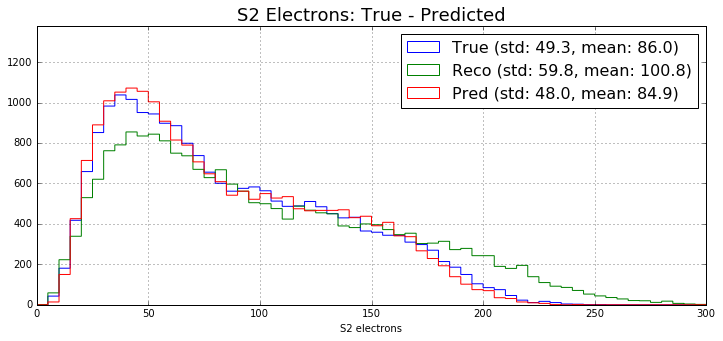

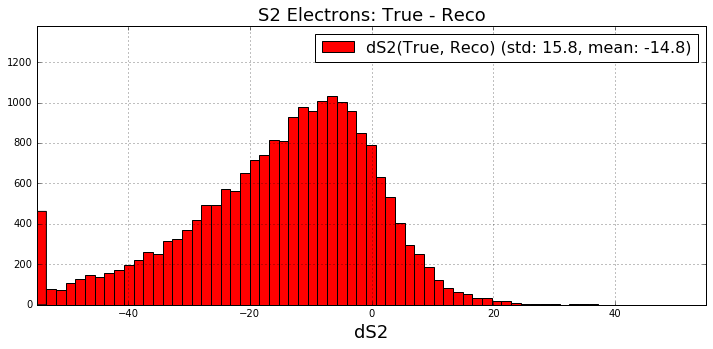

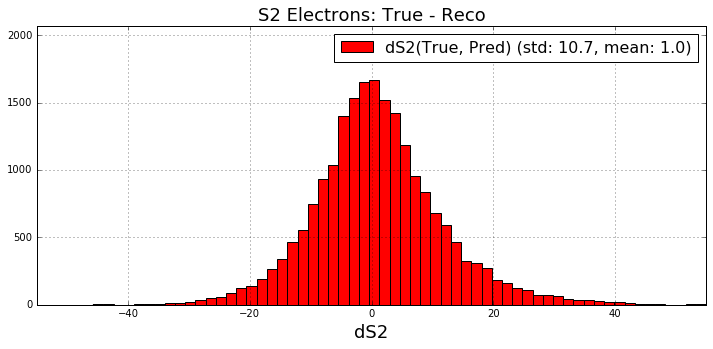

In [7]:

w, h = 12, 5


####################################################################################################
# S2 Electrons
####################################################################################################

print()

f = plt.figure(figsize=(w, h))
plt.hist(arr_s2_true, bins=s2_nbins, range=[0, s2_max], fill=False, histtype='step', label=s2_label_true)
plt.hist(arr_s2_reco, bins=s2_nbins, range=[0, s2_max], fill=False, histtype='step', label=s2_label_reco)
plt.hist(arr_s2_pred, bins=s2_nbins, range=[0, s2_max], fill=False, histtype='step', label=s2_label_pred)
plt.ylim([0, 1.15*plt.gca().get_ylim()[1]])
plt.title('S2 Electrons: True - Predicted', fontsize=18)
plt.xlabel('S2 electrons', fontsize=10)
plt.legend(fontsize=16)
plt.grid(True)

plt.savefig('plots/xyzS2_S2_barge.png')



####################################################################################################
# Resolution - Reco
####################################################################################################

f = plt.figure(figsize=(w, h))
plt.hist(arr_ds2_reco, bins=s2_delta_nbins, color='r', label=ds2_label_reco)
plt.xlim([-ds2_max, ds2_max])
plt.ylim([0, 1.15*plt.gca().get_ylim()[1]])
plt.title('S2 Electrons: True - Reco', fontsize=18)
plt.xlabel('dS2', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)

plt.savefig('plots/xyzS2_S2-resolution_reco_barge.png')


####################################################################################################
# Resolution
####################################################################################################

f = plt.figure(figsize=(w, h))
plt.hist(arr_ds2_pred, bins=s2_delta_nbins, color='r', label=ds2_label_pred)
plt.xlim([-ds2_max, ds2_max])
plt.ylim([0, 1.15*plt.gca().get_ylim()[1]])
plt.title('S2 Electrons: True - Reco', fontsize=18)
plt.xlabel('dS2', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)

plt.savefig('plots/xyzS2_S2-resolution_pred_barge.png')



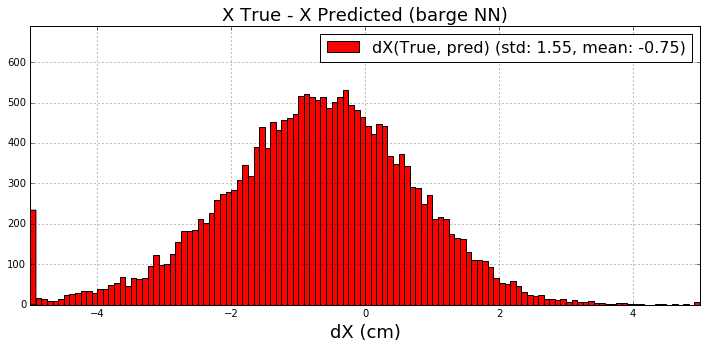

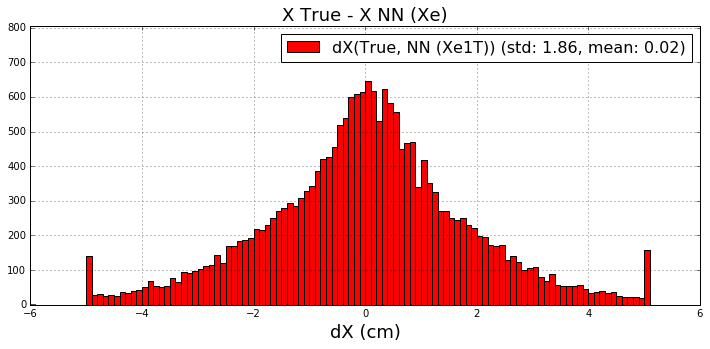

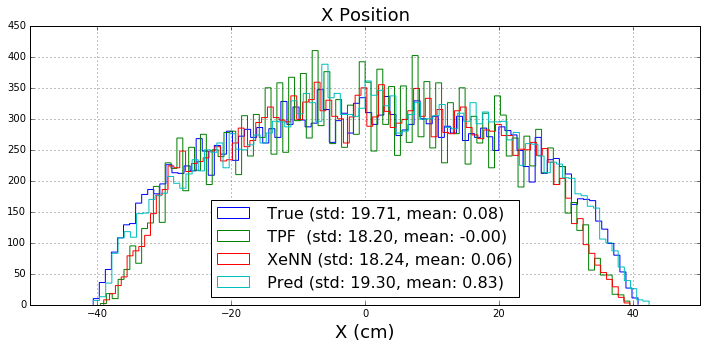

In [21]:

w, h = 12, 5

####################################################################################################
# Resolution - Prediction
####################################################################################################

f = plt.figure(figsize=(w, h))
plt.hist(arr_dr_true_pred, bins=dr_nbins, histtype='bar', color='r', label=dr_label_true_pred)
plt.xlim([-dr_max, dr_max])
plt.ylim([0, 1.15*plt.gca().get_ylim()[1]])
plt.title('X True - X Predicted (barge NN)', fontsize=18)
plt.xlabel('dX (cm)', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)

plt.savefig('plots/xyzS2_x-resolution_barge.png')


####################################################################################################
# Resolution - Xe NN
####################################################################################################

f = plt.figure(figsize=(w, h))
plt.hist(arr_dr_true_nn , bins=dr_nbins, range=dr_range, histtype='bar', color='r', label=dr_label_true_nn)
plt.ylim([0, 1.15*plt.gca().get_ylim()[1]])
plt.title('X True - X NN (Xe)', fontsize=18)
plt.xlabel('dX (cm)', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)


####################################################################################################
# Position
####################################################################################################

f = plt.figure(figsize=(w, h))
plt.hist(arr_r_true, bins=r_nbins, fill=False, histtype='step', label=label_true)
plt.hist(arr_r_tpf , bins=r_nbins, fill=False, histtype='step', label=label_tpf )
plt.hist(arr_r_nn  , bins=r_nbins, fill=False, histtype='step', label=label_nn  )
plt.hist(arr_r_pred, bins=r_nbins, fill=False, histtype='step', label=label_pred)
plt.xlabel('X (cm)', fontsize=18)
plt.title('X Position', fontsize=18)
plt.legend(loc='lower center', fontsize=16)
plt.grid(True)

plt.savefig('plots/xyzS2_x-resolution.png')


In [22]:


####################################################################################################
####################################################################################################

z_min     = -45
z_max     =  45
z_nbins   = 90

dz_nbins = 12*10
dz_range = [-6, 6]
dz_max   = 4

eps   = .001

z_mean_true  = np.mean(arr_z_true)
z_mean_pred  = np.mean(arr_z_pred)
z_mean_intr  = np.mean(arr_z_intr)

z_std_true   = np.std(arr_z_true)
z_std_pred   = np.std(arr_z_pred)
z_std_intr   = np.std(arr_z_intr)

dz_mean_true_pred = np.mean(arr_dz_true_pred)
dz_mean_true_intr = np.mean(arr_dz_true_intr)

dz_std_true_pred = np.std (arr_dz_true_pred)
dz_std_true_intr = np.std (arr_dz_true_intr)


label_true = '%5s (std: %.02f, mean: %.02f)' % ( 'True', z_std_true, z_mean_true )
label_pred = '%5s (std: %.02f, mean: %.02f)' % ( 'Pred', z_std_pred, z_mean_pred )
label_intr = '%5s (std: %.02f, mean: %.02f)' % ( 'Reco', z_std_intr, z_mean_intr )

dz_label_true_pred = '%5s (std: %.02f, mean: %.02f)' % ( 'dZ(true, pred)', dz_std_true_pred, dz_mean_true_pred )
dz_label_true_intr = '%5s (std: %.02f, mean: %.02f)' % ( 'dZ(true, reco)', dz_std_true_intr, dz_mean_true_intr )


####################################################################################################
# Overflow & Underflow
####################################################################################################

arr_dz_true_pred = np.clip(arr_dz_true_pred, -dz_max, dz_max)
arr_dz_true_intr = np.clip(arr_dz_true_intr, -dz_max, dz_max)



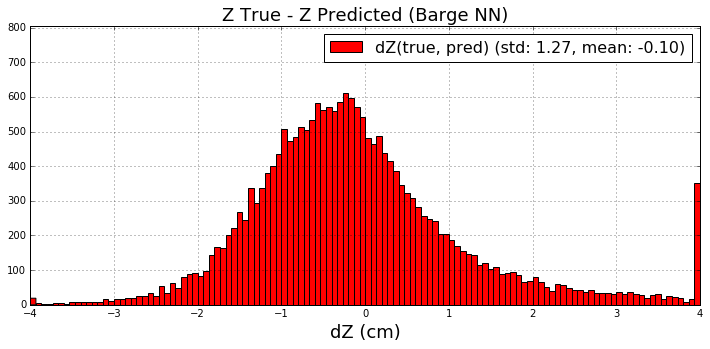

In [23]:



w, h = 12, 5

####################################################################################################
# Z Resolution - Prediction
####################################################################################################

f = plt.figure(figsize=(w, h))
plt.hist(arr_dz_true_pred, bins=dz_nbins, histtype='bar', color='r', label=dz_label_true_pred)
plt.xlim([-dz_max, dz_max])
plt.ylim([0, 1.15*plt.gca().get_ylim()[1]])
plt.title('Z True - Z Predicted (Barge NN)', fontsize=18)
plt.xlabel('dZ (cm)', fontsize=18)
plt.legend(fontsize=16)
plt.grid(True)

plt.savefig('plots/xyzS2_z-resolution_barge.png')


